In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
churn_df = pd.read_csv("customer_churn.csv")
churn_df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [5]:
churn_df.columns

Index(['Names', 'Age', 'Total_Purchase', 'Account_Manager', 'Years',
       'Num_Sites', 'Onboard_date', 'Location', 'Company', 'Churn'],
      dtype='object')

In [7]:
inputCols = ['Age',
    'Total_Purchase',
    'Account_Manager',
    'Years',
    'Num_Sites',  
    'Churn']

In [9]:
churn_df = churn_df[inputCols]

In [11]:
churn_df['Churn'] = churn_df['Churn'].astype('int')
churn_df.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,42.0,11066.80,0,7.22,8.0,1
1,41.0,11916.22,0,6.50,11.0,1
2,38.0,12884.75,0,6.67,12.0,1
3,42.0,8010.76,0,6.71,10.0,1
4,37.0,9191.58,0,5.56,9.0,1


In [13]:
X = np.asarray(churn_df[['Age', 'Total_Purchase', 'Account_Manager', 'Years', 'Num_Sites',
       'Churn']])
X[0:5]

array([[4.200000e+01, 1.106680e+04, 0.000000e+00, 7.220000e+00,
        8.000000e+00, 1.000000e+00],
       [4.100000e+01, 1.191622e+04, 0.000000e+00, 6.500000e+00,
        1.100000e+01, 1.000000e+00],
       [3.800000e+01, 1.288475e+04, 0.000000e+00, 6.670000e+00,
        1.200000e+01, 1.000000e+00],
       [4.200000e+01, 8.010760e+03, 0.000000e+00, 6.710000e+00,
        1.000000e+01, 1.000000e+00],
       [3.700000e+01, 9.191580e+03, 0.000000e+00, 5.560000e+00,
        9.000000e+00, 1.000000e+00]])

In [15]:
print(churn_df.columns) #Mengecek kolom apa saja yang terdapat pada data

Index(['Age', 'Total_Purchase', 'Account_Manager', 'Years', 'Num_Sites',
       'Churn'],
      dtype='object')


In [17]:
y = np.asarray(churn_df['Churn'])
y  [0:5]

array([1, 1, 1, 1, 1])

In [19]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.0299361 ,  0.41705373, -0.96290958,  1.52844634, -0.33323478,
         2.23606798],
       [-0.13335172,  0.76990459, -0.96290958,  0.96318219,  1.36758544,
         2.23606798],
       [-0.6232152 ,  1.172234  , -0.96290958,  1.09664734,  1.93452551,
         2.23606798],
       [ 0.0299361 , -0.85243173, -0.96290958,  1.1280509 ,  0.80064537,
         2.23606798],
       [-0.78650303, -0.36191661, -0.96290958,  0.22519844,  0.2337053 ,
         2.23606798]])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (720, 6) (720,)
Test set: (180, 6) (180,)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR


LogisticRegression(C=0.01, solver='liblinear')

In [31]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0])

In [33]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.73465123, 0.26534877],
       [0.71593554, 0.28406446],
       [0.83010192, 0.16989808],
       [0.84525228, 0.15474772],
       [0.81499805, 0.18500195],
       [0.81200979, 0.18799021],
       [0.82073356, 0.17926644],
       [0.84656755, 0.15343245],
       [0.78987158, 0.21012842],
       [0.86209364, 0.13790636],
       [0.7959621 , 0.2040379 ],
       [0.85478401, 0.14521599],
       [0.13774181, 0.86225819],
       [0.82794067, 0.17205933],
       [0.73768546, 0.26231454],
       [0.87004082, 0.12995918],
       [0.82845427, 0.17154573],
       [0.13975149, 0.86024851],
       [0.78331182, 0.21668818],
       [0.82393695, 0.17606305],
       [0.16628336, 0.83371664],
       [0.84479838, 0.15520162],
       [0.87883907, 0.12116093],
       [0.75950177, 0.24049823],
       [0.7773199 , 0.2226801 ],
       [0.83184979, 0.16815021],
       [0.84567892, 0.15432108],
       [0.83693129, 0.16306871],
       [0.83882595, 0.16117405],
       [0.82584535, 0.17415465],
       [0.

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 30   0]
 [  0 150]]


Confusion matrix, without normalization
[[ 30   0]
 [  0 150]]


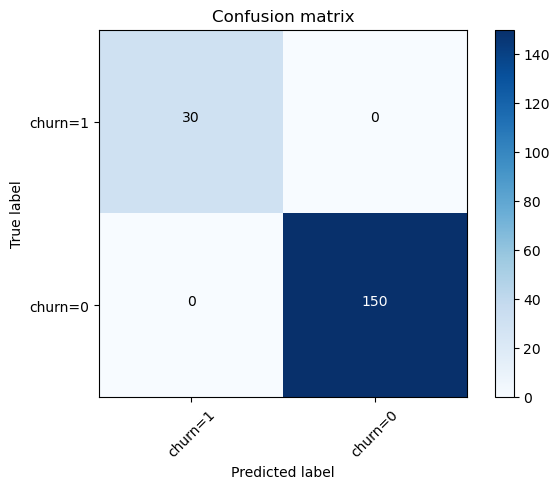

In [39]:
#Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])

np.set_printoptions(precision=2)

#Plot non-normalized confusion matrix
plt.figure()

plot_confusion_matrix(cnf_matrix, classes=['churn=1', 'churn=0'], normalize=False, title='Confusion matrix')

In [41]:
print( classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00        30

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180

